### Capstone Project Home Credit Default Risk



## Overview : 

There are lots of people who do not particularly have a prior credit history, for example students, small businessmen, etc. who need credits, be it for studies, or for setting up some sort of businesses. Without adequate credit history, the lending organizations find it difficult to lend credits to such people, as these loans could be associated with high risks. In these kinds of situations, some lending organizations even tend to exploit the borrowers by asking for too high of an interest rate.<br>
There are another subset of people, who do have prior credit history, which could be with the same organization or some other organizations. However, going through that historical data could be very time consuming and redundant. This would scale up even further as the number of applicants increases.<br>
For such cases, if there could be a way through which the lending organization could predict or estimate the borrower’s repayment capability, the process could be streamlined and be made effective for both the lender and the borrower. It could save resources both in terms of humans and time.<br>
So the main two questions that the lender needs answer to are:<br>
1) How risky is the borrower?<br>
2) Given the borrower’s risk, should we give him/her loan?<br>



#### Business Objective: Home Credit Default Risk
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.<br>
 
Home depot wants to have a model that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.<br>


## Data:

Data for this project is from a Kaggle competition. Description of the data is below:<br>


<b>application_{train|test}.csv</b><br>

- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).<br>
- Static data for all applications. One row represents one loan in our data sample.<br>

<b>bureau.csv</b><br>

- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).<br>
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.<br>

<b>bureau_balance.csv</b><br>

- Monthly balances of previous credits in Credit Bureau.<br>
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.<br>


<b>POS_CASH_balance.csv</b><br>

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.<br>

<b>credit_card_balance.csv</b><br>

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.<br>
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.<br>

<b>previous_application.csv</b><br>

- All previous applications for Home Credit loans of clients who have loans in our sample.<br>
- There is one row for each previous application related to loans in our data sample.<br>

<b>installments_payments.csv</b><br>

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.<br>
- There is a) one row for every payment that was made plus b) one row each for missed payment.<br>
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.<br>

<b>HomeCredit_columns_description.csv</b><br>

- This file contains descriptions for the columns in the various data files.

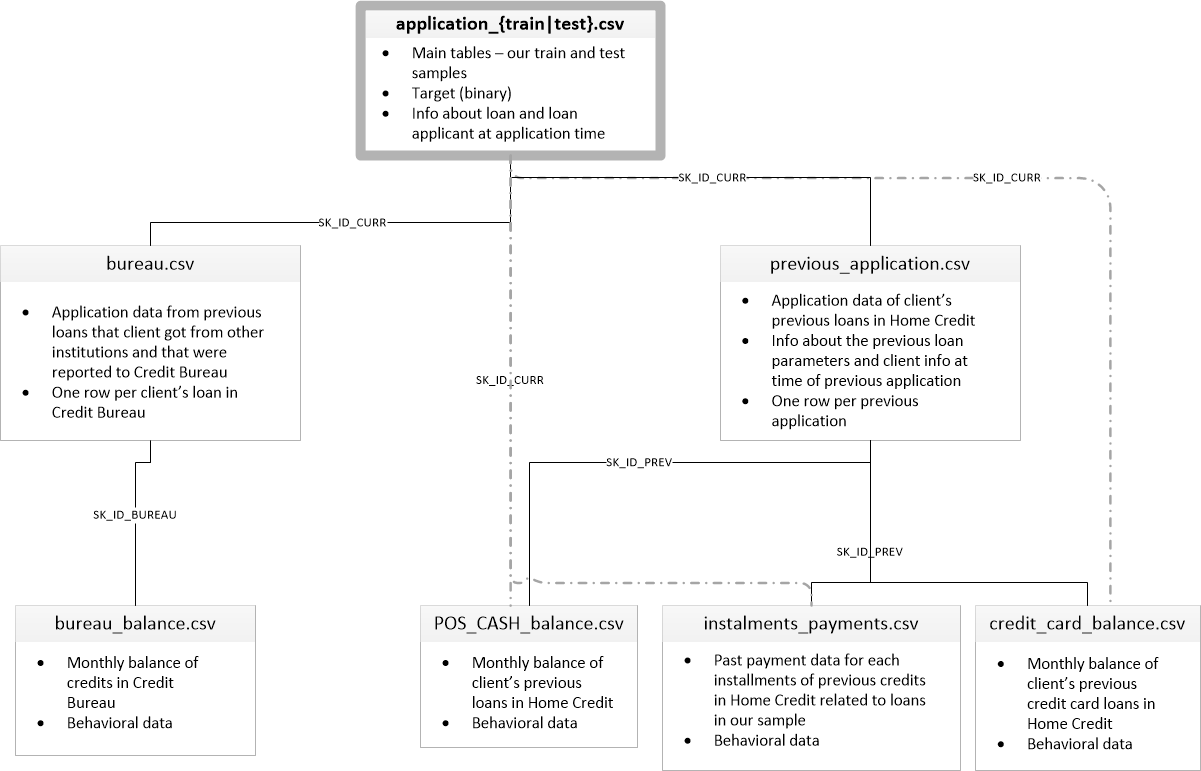

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score
from sklearn.neural_network import MLPClassifier
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string




In [2]:
train = pd.read_csv( 'application_train.csv')
test = pd.read_csv('application_test.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print('Training set shape:', train.shape)
print('Test set shape:    ', test.shape)

Training set shape: (307511, 122)
Test set shape:     (48744, 121)


Test is considerably smaller and doesn't have "TARGET" column.

In [4]:
train.TARGET.value_counts() / len(train)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [5]:
train = train.dropna(how='all')
train.shape

(307511, 122)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


## Exploratory Data Analysis

0    282686
1     24825
Name: TARGET, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


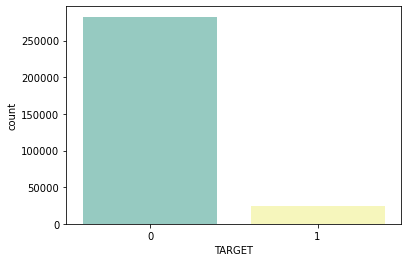

In [7]:
print(train['TARGET'].value_counts())
sns.countplot(train['TARGET'],palette='Set3')
plt.savefig('target.png',dpi=300,bbox_inches='tight')
plt.show()

Target is very unbalaced which is normal. Which means most peopel are cleared to get a loan

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


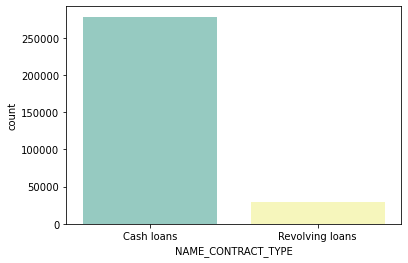

In [8]:
print(train['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(train['NAME_CONTRACT_TYPE'],palette='Set3')
plt.savefig('namecontract.png',dpi=300,bbox_inches='tight')
plt.show()

Around 90% of contract type is cash loan and 10% is revolving loan

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


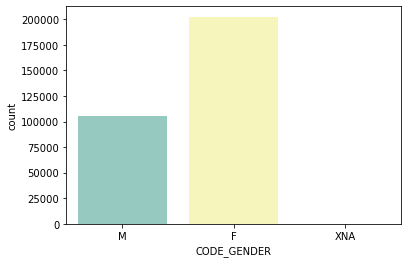

In [9]:
print(train['CODE_GENDER'].value_counts())
sns.countplot(train['CODE_GENDER'],palette='Set3')
plt.savefig('codegender.png',dpi=300,bbox_inches='tight')
plt.show()


In [10]:
a=train['CODE_GENDER'].value_counts()
a.M/(a.M+a.F)

0.34164750721121795

More than 66% of applicants are female.

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


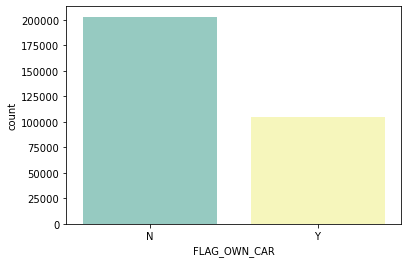

In [11]:
print(train['FLAG_OWN_CAR'].value_counts())
sns.countplot(train['FLAG_OWN_CAR'],palette='Set3')
plt.savefig('flagcar.png',dpi=300,bbox_inches='tight')
plt.show()

In [12]:
a = train['FLAG_OWN_CAR'].value_counts()
a.N/(a.N+a.Y)

0.6598918412674668

About 66% of applicants do not own a car

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


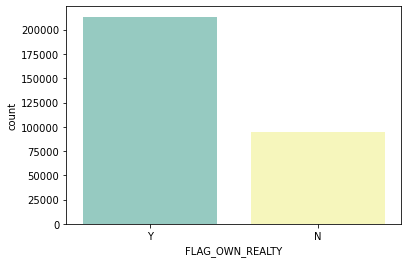

In [13]:
print(train['FLAG_OWN_REALTY'].value_counts())
sns.countplot(train['FLAG_OWN_REALTY'],palette='Set3')
plt.savefig('flagown.png',dpi=300,bbox_inches='tight')
plt.show()

In [14]:
a=train['FLAG_OWN_REALTY'].value_counts()
a.N/(a.N+a.Y)

0.30632725333402705

About 70% have their own realty

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


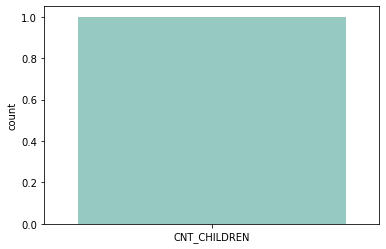

In [15]:
print(train['CNT_CHILDREN'].value_counts())
sns.countplot(['CNT_CHILDREN'],palette="Set3")
plt.show() #Number of children the client has

In [16]:
train['AMT_INCOME_TOTAL'].describe()['mean']

168797.9192969845

In [17]:
train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [18]:
train['AMT_CREDIT'].describe()['mean']

599025.9997057016

In [19]:
train['AMT_GOODS_PRICE'].describe()['mean']


538396.2074288895

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


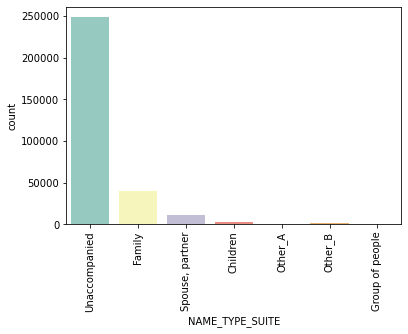

<Figure size 432x288 with 0 Axes>

In [20]:
print(train['NAME_TYPE_SUITE'].value_counts())
sns.countplot(train['NAME_TYPE_SUITE'],palette="Set3")
plt.xticks(rotation=90)
plt.show() #Who was accompanying client when he was applying for the loan
plt.savefig('nametype.png',dpi=300,bbox_inches='tight')


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


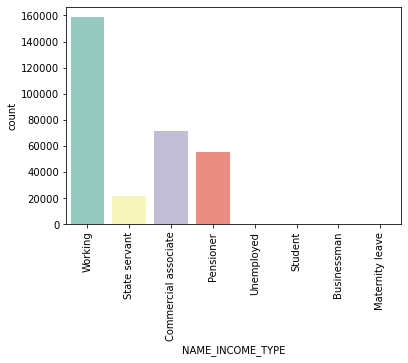

In [21]:
print(train['NAME_INCOME_TYPE'].value_counts())
sns.countplot(train['NAME_INCOME_TYPE'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameincome.png',dpi=300,bbox_inches='tight')
plt.show() #Clients income type (businessman, working, maternity leave, ...)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


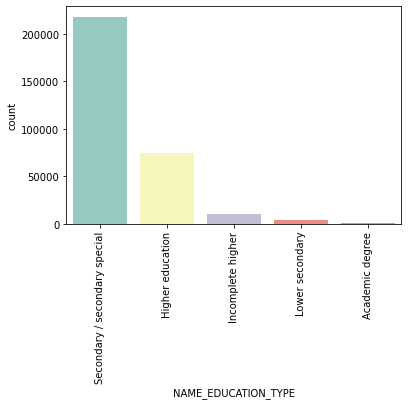

In [22]:
print(train['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(train['NAME_EDUCATION_TYPE'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameedu',dpi=300,bbox_inches='tight')
plt.show() #Level of highest education the client achieved

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


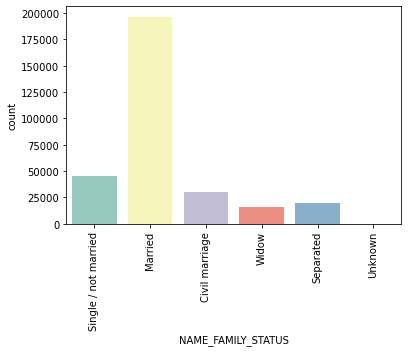

In [23]:



print(train['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(train['NAME_FAMILY_STATUS'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameFam.png',dpi=300,bbox_inches='tight')
plt.show() #Family status of the client

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


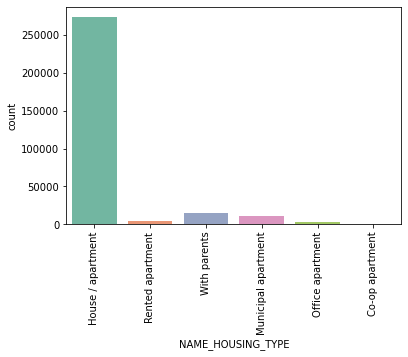

In [24]:


print(train['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(train['NAME_HOUSING_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #What is the housing situation of the client (renting, living with parents, ...)


House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


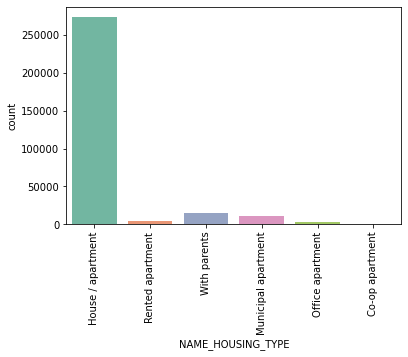

In [25]:




print(train['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(train['NAME_HOUSING_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #What is the housing situation of the client (renting, living with parents, ...)

In [26]:
train['REGION_POPULATION_RELATIVE'].describe() 
#Normalized population of region where client lives (higher number means the client lives in more populated region)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [27]:
train['DAYS_BIRTH'].describe()
#Client's age in days at the time of application-time only relative to the application

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [28]:
train['DAYS_EMPLOYED'].describe()
#How many days before the application the person started current employment-time only relative to the application

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Checking the missing values

In [29]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [30]:
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

#### Column Type

In [31]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [32]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Changing Categorical features

using one hot encoding 

In [33]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


#### Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [34]:
train_labels = train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


##### checking different colums

Cleaning up days birth

In [35]:
(train['DAYS_BIRTH'] / -365 ).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## Feature selection

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [37]:
train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,1,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


### classification

In [44]:


X = train.drop('TARGET',axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

#sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#X_test = sc.transform(X_test)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (215257, 242)
Testing data shape:  (92254, 242)


In [45]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correct accuracy of the train set with Logistic Regression is: 91.8758 %
Correct accuracy of the test set with Logistic Regression is: 92.0209 %

Total elapsed time is: 8.5649  sec

Confusion Matrix is:
[[84817    97]
 [ 7264    76]]

Logistic Regression log_loss is: 2.7559

Average precision-recall score: 0.0833


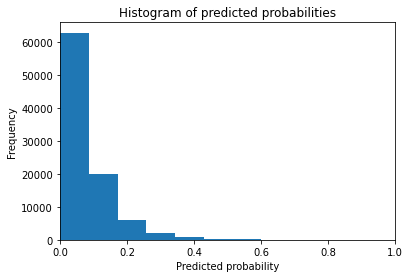

In [46]:
LogClassifier= LogisticRegression(random_state = 0)
start=time.time()
LogClassifier.fit(X_train, y_train)
end=time.time()
y_pred=LogClassifier.predict(X_test)
y_pred_prob=LogClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=LogClassifier.predict_proba(X_train)[:, 1]

print('Correct accuracy of the train set with Logistic Regression is:', round(LogClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Logistic Regression is:', round(LogClassifier.score(X_test,y_test)*100,4),'%')
print('')
print('Total elapsed time is:', round(end-start,4),' sec')
#start=time.time()
#LogScores = cross_val_score(LogClassifier, X, y, cv=5)
#end=time.time()
#print('Logistic Regression score mean with cross val is:',round(np.mean(LogScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Logistic Regression log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

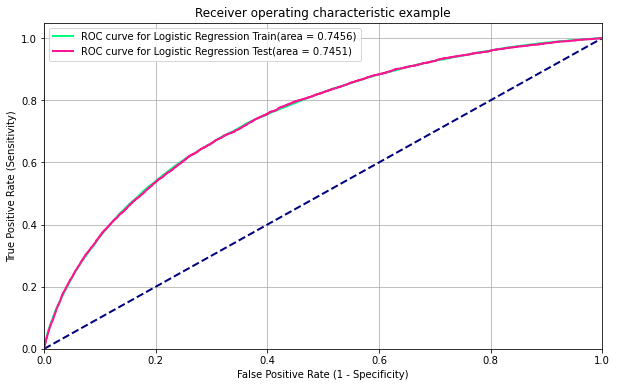

In [ ]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Logistic Regression Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Logistic Regression Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('LG.png',dpi=300,bbox_inches='tight')
y_log=y_test
y_pred_log=y_pred_prob

ResultLG={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }